In [8]:
# Librerias

import os
import pandas as pd
import sys
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 


# 1. ¿El modelo mantiene un rendimiento consistente?

Primero se cargaran los resultados del modelo:

In [10]:
csv_path = os.path.join(project_root, "data", "evaluation", "metrics_by_month.csv")

df_metrics = pd.read_csv(csv_path)
df_metrics

,mes,cantidad_ejemplos,f1_score,accuracy,roc_auc,precision,recall,log_loss,balanced_accuracy
0,2020-02,100000,0.499953,0.52587,0.563651,0.615253,0.421047,0.708114,0.540963
1,2020-03,100000,0.527416,0.53700,0.573960,0.621611,0.458012,0.700765,0.548613
2,2020-04,100000,0.489733,0.56314,0.579693,0.502120,0.477943,0.685050,0.553826


In [12]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

conf_matrix_dir = os.path.join("visualization", "conf_matrix")

for filename in sorted(os.listdir(conf_matrix_dir)):
    if filename.endswith(".png"):
        img_path = os.path.join(conf_matrix_dir, filename)
        img = mpimg.imread(img_path)
        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Matriz de Confusión - {filename}")
        plt.show()



FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'visualization\\conf_matrix'

### Exploración de los dataset originales (enero a abril 2020)

In [2]:
from src.config import TRAIN_RAW_PATH, TEST_RAW_PATH, MESES_EVALUACION

# Cargar entrenamiento crudo
train_file = os.path.join(TRAIN_RAW_PATH, "yellow_tripdata_2020-01.parquet")
df_train_raw = pd.read_parquet(train_file)
df_train_raw["origen"] = "2020-01"

# Cargar evaluación cruda por mes
df_list = [df_train_raw]
for mes in MESES_EVALUACION:
    test_file = os.path.join(TEST_RAW_PATH, f"yellow_tripdata_{mes}.parquet")
    if os.path.exists(test_file):
        df_mes = pd.read_parquet(test_file)
        df_mes["origen"] = mes
        df_list.append(df_mes)
    else:
        print(f"Archivo no encontrado: {test_file}")

# Concatenar todos los datos crudos
df_acum_crudo = pd.concat(df_list, ignore_index=True)
df_acum_crudo

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,origen
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1,6.00,3.0,0.5,1.47,0.00,0.3,11.27,2.5,None,2020-01
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1,7.00,3.0,0.5,1.50,0.00,0.3,12.30,2.5,None,2020-01
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1,6.00,3.0,0.5,1.00,0.00,0.3,10.80,2.5,None,2020-01
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1,5.50,0.5,0.5,1.36,0.00,0.3,8.16,0.0,None,2020-01
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2,3.50,0.5,0.5,0.00,0.00,0.3,4.80,0.0,None,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15950130,2,2020-04-30 23:30:00,2020-04-30 23:39:00,NaN,2.02,NaN,None,238,75,0,8.46,0.0,0.5,0.00,0.00,0.3,11.76,NaN,None,2020-04
15950131,2,2020-04-30 23:44:00,2020-04-30 23:54:00,NaN,3.30,NaN,None,263,230,0,13.46,0.0,0.5,0.00,0.00,0.3,16.76,NaN,None,2020-04
15950132,2,2020-04-30 23:25:00,2020-04-30 23:38:00,NaN,6.40,NaN,None,137,42,0,22.05,0.0,0.5,0.00,0.00,0.3,25.35,NaN,None,2020-04
15950133,2,2020-04-30 23:50:26,2020-05-01 00:28:21,NaN,25.70,NaN,None,29,69,0,68.16,0.0,0.5,0.00,6.12,0.3,77.58,NaN,None,2020-04


In [7]:
df_acum_crudo.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'origen',
       'tip_label'],
      dtype='object')

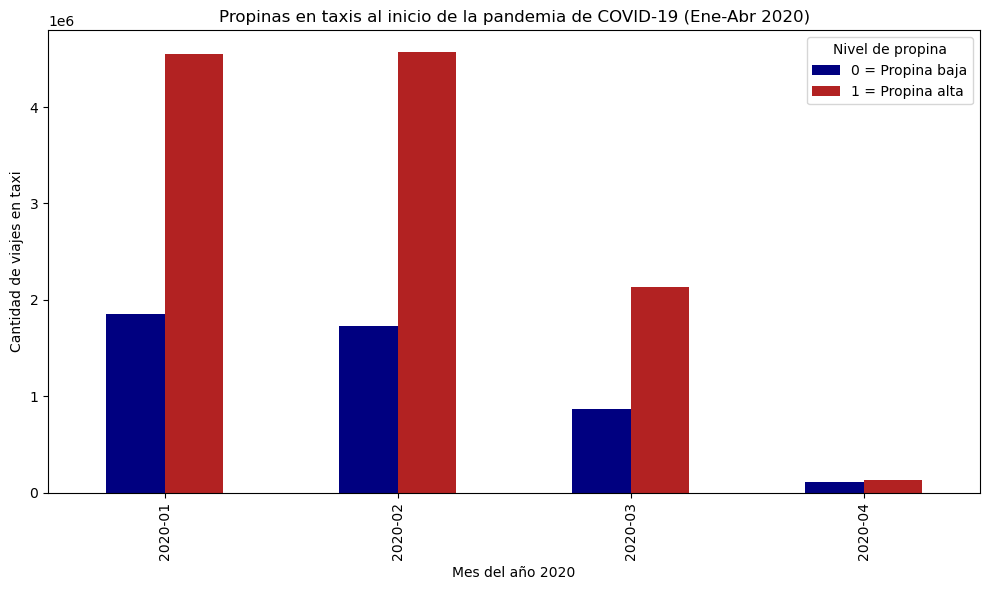

In [15]:
import matplotlib.pyplot as plt

# Filtrar solo enero a abril 2020
meses_filtrados = ["2020-01", "2020-02", "2020-03", "2020-04"]
conteo_filtrado = conteo.loc[conteo.index.isin(meses_filtrados)]

# Graficar barras separadas (no apiladas)
conteo_filtrado.plot(kind="bar", stacked=False, figsize=(10, 6), color=["navy", "firebrick"])

plt.title("Propinas en taxis al inicio de la pandemia de COVID-19 (Ene-Abr 2020)")
plt.xlabel("Mes del año 2020")
plt.ylabel("Cantidad de viajes en taxi")
plt.legend(title="Nivel de propina", labels=["0 = Propina baja", "1 = Propina alta"])
plt.tight_layout()
plt.show()


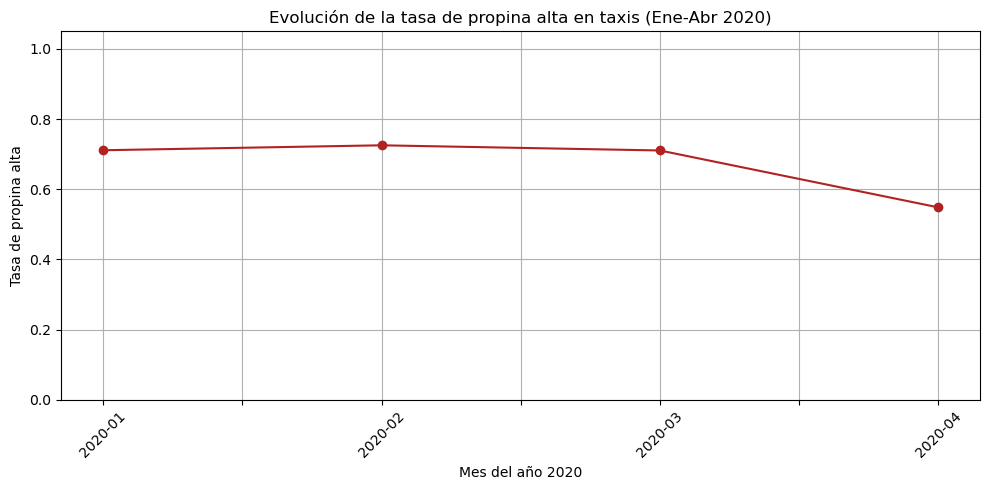

In [17]:
# Calcular tasa de alta propina por mes
tasa_alta_propina = conteo_filtrado[1] / (conteo_filtrado[0] + conteo_filtrado[1])

# Graficar tasa de propina alta
plt.figure(figsize=(10, 5))
tasa_alta_propina.plot(kind='line', marker='o', color='firebrick')

# Mejorar etiquetas y estilo del gráfico
plt.title("Evolución de la tasa de propina alta en taxis (Ene-Abr 2020)")
plt.xlabel("Mes del año 2020")
plt.ylabel("Tasa de propina alta")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

